# 7. Hafta Lab-4: Yapay Sinir Ağları
## SİB 552: Siber Güvenlik İçin Veri Madenciliği
## Gebze Teknik Üniversitesi - Siber Güvenlik Yüksek Lisans Programı
### Dr. Ferhat Özgür Çatak

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model
from keras import regularizers

### Mnist veri kümesi

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Autoencoder model

In [6]:
input_img = Input(shape=(x_train.shape[1],)) # 784
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.summary()
#plot_model(autoencoder, show_shapes=True, to_file="ae.png")
#Image("ae.png")

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Autoencoder modelini compile edelim

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Modeli eğitelim

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3549 - val_loss: 0.2700
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2614 - val_loss: 0.2486
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2383 - val_loss: 0.2262
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2194 - val_loss: 0.2101
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2054 - val_loss: 0.1980
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1947 - val_loss: 0.1887
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1863 - val_loss: 0.1813
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1794 - val_loss: 0.1750
Epoch 9/10
60000/60000 [==============================] - 2s 2

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [9]:
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs.shape

(10000, 784)

### Decode edilmiş resimleri gösterelim.

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("digits.png")
plt.show()

<Figure size 2000x400 with 20 Axes>

### Kayıp fonksiyonunun değişimi

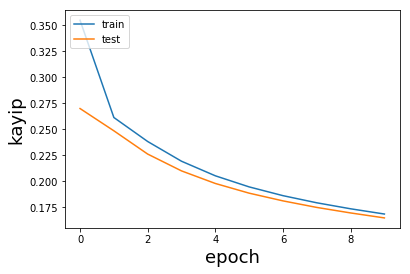

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Sparse Autoencoder

In [12]:
input_img = Input(shape=(x_train.shape[1],)) # 784
# add a Dense layer with a L1 activity regularizer
encoded = Dense(32, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
#plot_model(autoencoder, show_shapes=True, to_file="ae-sparse.png")
#Image("ae-sparse.png")
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.6733 - val_loss: 0.6484
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.4531 - val_loss: 0.4457
Epoch

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [15]:
decoded_imgs = autoencoder.predict(x_test)

### Decode edilmiş resimleri gösterelim.

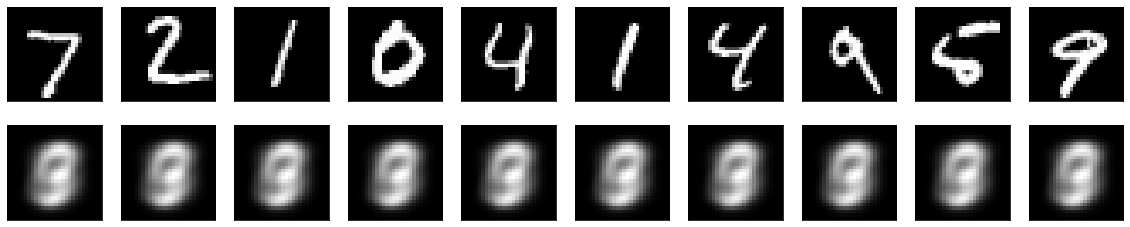

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig("digits.png")
plt.show()

### Kayıp fonksiyonunun değişimi

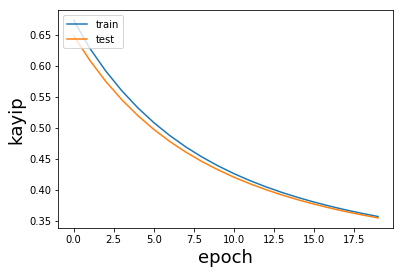

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Deep AutoEncoder Model

In [18]:
input_img = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#plot_model(autoencoder, show_shapes=True, to_file="ae-deep.png")
#Image("ae-deep.png")
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total para

### Modeli eğitelim

In [19]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3291 - val_loss: 0.2635
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2532 - val_loss: 0.2400
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2289 - val_loss: 0.2194
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2099 - val_loss: 0.1992
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1954 - val_loss: 0.1901
Epoch 6/10
60000/60000 [==============================] - ETA: 0s - loss: 0.188 - 2s 39us/step - loss: 0.1879 - val_loss: 0.1844
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1822 - val_loss: 0.1785
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1763 - val_loss: 0.1725
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1711 

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [20]:
decoded_imgs = autoencoder.predict(x_test)

### Decode edilmiş resimleri gösterelim.

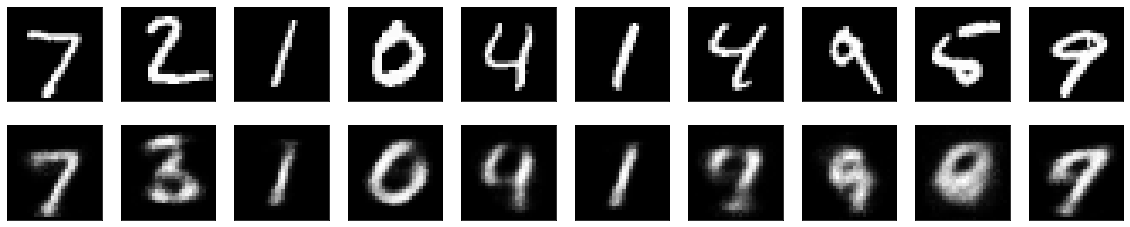

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig("digits.png")
plt.show()